# connect to db

In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

db = config['myaws']['db']
host = config['myaws']['host']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db)

# q1

In [4]:
sql = "select * from student"

In [5]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_1238/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s3,IA


# q2

In [6]:
sql = """
select professor.p_name,
course.c_name
from professor
inner join course
on professor.p_email = course.p_email

"""

In [7]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_1238/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter
4,p4,linkedin


# q3

In [8]:
sql = """
select c_number, count(*) as num_student 
from enroll
group by c_number
order by num_student desc
"""

/tmp/ipykernel_1238/1433585107.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

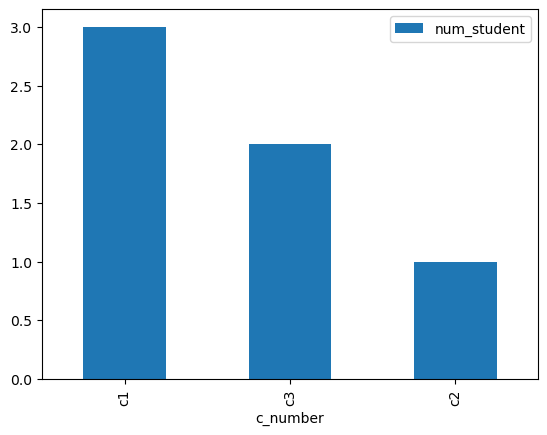

In [9]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number',y='num_student')

# q4

In [10]:
sql = """
select professor.p_name,
count(course.c_name) as num_course
from professor
inner join course
on professor.p_email = course.p_email
group by professor.p_name
order by num_course desc
"""

/tmp/ipykernel_1238/720569572.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

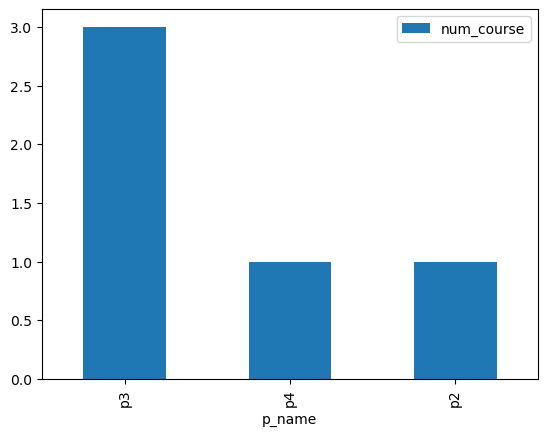

In [11]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='num_course')

# q5

In [12]:
cur = conn.cursor()

In [13]:
sql = """
insert into professor(p_email,p_name,office)
values('p4@jmu.edu','p4','o4') ;
"""

In [14]:
cur.execute(sql)

In [15]:
conn.commit()

In [16]:
df=pandas.read_sql_query('select * from professor', conn)
df[:]

/tmp/ipykernel_8942/3494731394.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query('select * from professor', conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [19]:
sql = """
insert into course(c_number,c_name,room,p_email)
values('c5','linkedin','r2','p4@jmu.edu')
"""

In [20]:
cur.execute(sql)

In [21]:
conn.commit()

In [22]:
df=pandas.read_sql_query('select * from course', conn)
df[:]

/tmp/ipykernel_8942/1388357428.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query('select * from course', conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


# q6

In [1]:
sql = """
update course
set p_email = 'p4@jmu.edu'
where p_email = 'p2@jmu.edu' ; 

delete from professor
where p_email = 'p2@jmu.edu'
"""

In [13]:
cur.execute(sql)

In [21]:
cur.execute('rollback')

In [22]:
sql="""
update course
set p_email = '{}'
where p_email = '{}'
""".format('p4@jmu.edu','p2@jmu.edu')

In [23]:
cur.execute(sql)

In [24]:
conn.commit()

In [25]:
df=pandas.read_sql_query('select * from course', conn)
df[:]

/tmp/ipykernel_1238/1388357428.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query('select * from course', conn)


,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [26]:
sql="""
delete from professor
where p_email = '{}'
""".format('p2@jmu.edu')

In [27]:
cur.execute(sql)

In [28]:
conn.commit()

In [29]:
df=pandas.read_sql_query('select * from professor', conn)
df[:]

/tmp/ipykernel_1238/3494731394.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query('select * from professor', conn)


,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4
